# Video Games Sale Data Analysis

A simplistic execution of EDA (Exploratory Data Analysis), to answer 7 questions, and perform a poisson distribution to model the data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
# Calling the CSV
df = pd.read_csv(r'B:\Python Environments\Video Game Data Analysis\Raw Data\vgsales.csv')
#r'' because I just want to copy/paste the path without changing all the \ to / or to \\

In [ ]:
# Cleaning the Dataset from N/A and Nulls
df.dropna(inplace=True)

In [17]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [47]:
## Question 1: Top-selling Video Games ##

# Group by name and sum of global sales
top_selling = df.groupby('Name')['Global_Sales'].sum()

# Sort by global sales
top_selling = top_selling.sort_values(ascending=False)

# Displaying the top 15 games
print(top_selling.head(15))

Name
Wii Sports                        82.74
Grand Theft Auto V                55.92
Super Mario Bros.                 45.31
Tetris                            35.84
Mario Kart Wii                    35.82
Wii Sports Resort                 33.00
Pokemon Red/Pokemon Blue          31.37
Call of Duty: Modern Warfare 3    30.83
New Super Mario Bros.             30.01
Call of Duty: Black Ops II        29.72
Call of Duty: Black Ops           29.40
Wii Play                          29.02
New Super Mario Bros. Wii         28.62
Duck Hunt                         28.31
Call of Duty: Ghosts              27.38
Name: Global_Sales, dtype: float64


In [27]:
## Question 2: Platform Popularity ##

# Group by platform and sum of global sales
top_platform = df.groupby('Platform')['Global_Sales'].sum()

# Sort by platform sales
top_platform = top_platform.sort_values(ascending=False)

# Displaying the top 10 platforms
print(top_platform.head(10))

Platform
PS2     1233.46
X360     969.60
PS3      949.35
Wii      909.81
DS       818.91
PS       727.39
GBA      305.62
PSP      291.71
PS4      278.10
PC       254.70
Name: Global_Sales, dtype: float64


In [28]:
## Question 3: Genre Popularity ##

# Group by genre and sum of global sales
top_genre = df.groupby('Genre')['Global_Sales'].sum()

# Sort by genre sales
top_genre = top_genre.sort_values(ascending=False)

# Displaying the top 10 genres
print(top_genre.head(10))

Genre
Action          1722.84
Sports          1309.24
Shooter         1026.20
Role-Playing     923.83
Platform         829.13
Misc             789.87
Racing           726.76
Fighting         444.05
Simulation       389.98
Puzzle           242.21
Name: Global_Sales, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

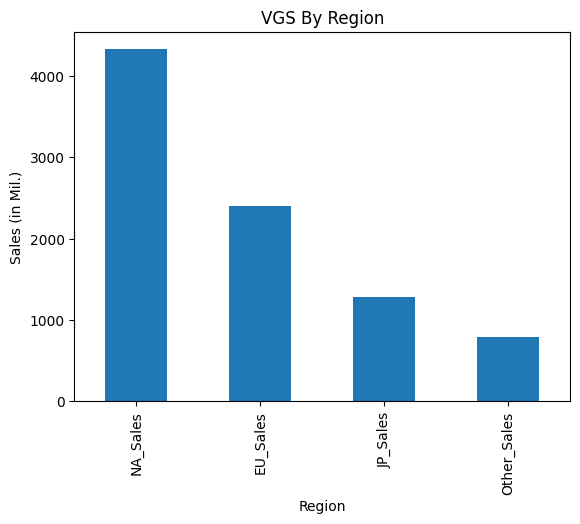

In [34]:
## Question 4: Sales by Region ##

region_sales = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()

region_sales.plot(kind='bar')
plt.title('VGS By Region')
plt.xlabel('Region')
plt.ylabel('Sales (in Mil.)')
plt.show


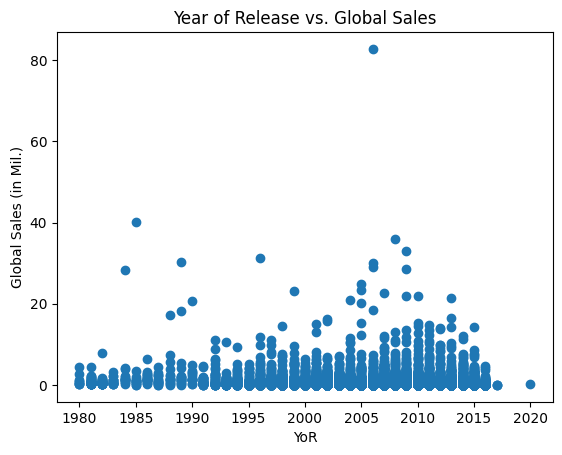

In [35]:
## Question 5, Hypothesis 1: Relationship between year of release and global sales ##

plt.scatter(df['Year'],df['Global_Sales'])
plt.title('Year of Release vs. Global Sales')
plt.xlabel('YoR')
plt.ylabel('Global Sales (in Mil.)')
plt.show()

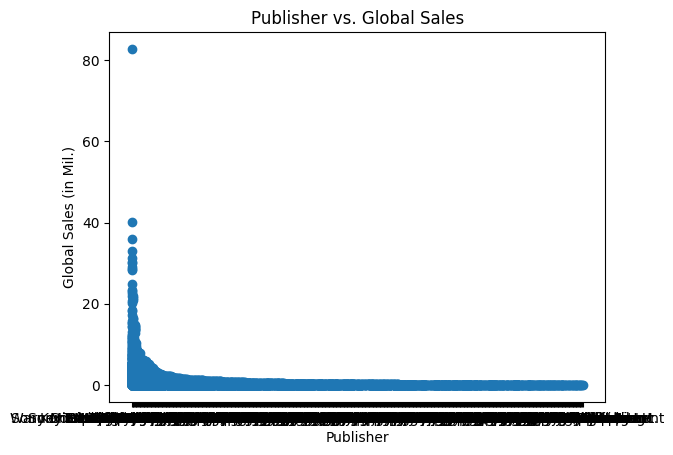

In [36]:
## Question 6, Hypothesis 2: Relationship between publisher and global sales ##

plt.scatter(df['Publisher'],df['Global_Sales'])
plt.title('Publisher vs. Global Sales')
plt.xlabel('Publisher')
plt.ylabel('Global Sales (in Mil.)')
plt.show()

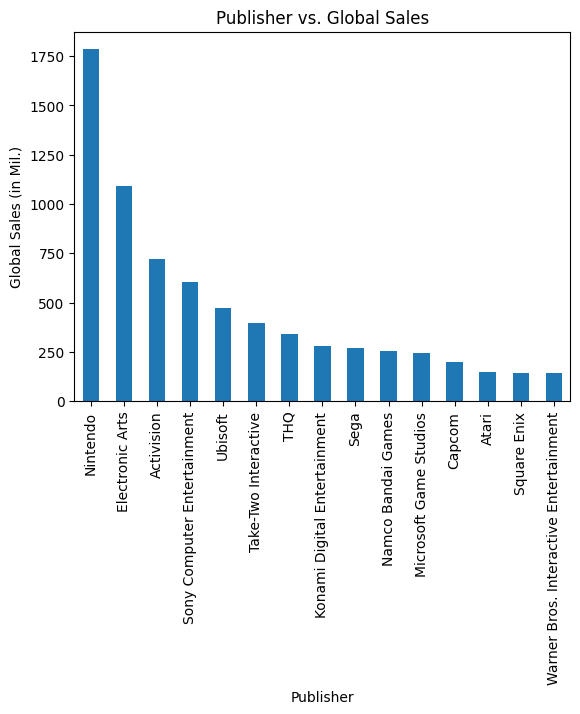

In [40]:
# Whoops! It seems we need to do an extra stepf or this one. Let's attempt on grouping them by sales and then sorting them.

publisher_vs = df.groupby('Publisher')['Global_Sales'].sum()

publisher_vs = publisher_vs.sort_values(ascending=False)

publisher_vs.head(15).plot(kind='bar')
plt.title('Publisher vs. Global Sales')
plt.xlabel('Publisher')
plt.ylabel('Global Sales (in Mil.)')
plt.show()

In [42]:
## Question 7: Would a Poisson distribution be appropriate to model the sales data? ##

# First Calculations #

# Mean and variance calculation
mean = df['Global_Sales'].mean()
var = df['Global_Sales'].var()

# Expected mean and variance calculation

exp_mean = var
exp_var = var

# Mean & variance vs. expected values

print('Mean sales', mean)
print('Variance of sales', var)
print('Expected mean', exp_mean)
print('Expected variance', exp_var)

Mean sales 0.5409103185808114
Variance of sales 2.456568802945086
Expected mean 2.456568802945086
Expected variance 2.456568802945086


Text(0, 0.5, 'Probability')

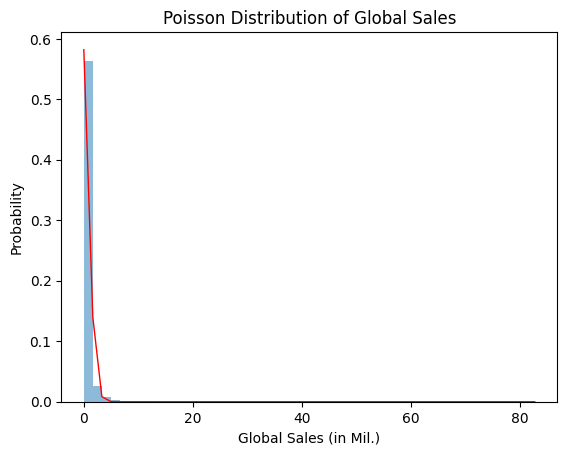

In [46]:
# Second Calculations #

# Poisson Distribution

def poisson_prob(k, lam):
    return (lam**k)*math.exp(-lam)/math.gamma(k+1)

mean = np.mean(df['Global_Sales'])

# Generating a histogram of the sales
n, bins, patches = plt.hist(df['Global_Sales'], bins=50, density=True, alpha=0.5)

# Calculating the distribution
poisson_dist = [poisson_prob(b,mean) for b in bins]

# Plotting the distribution over the histogram
plt.plot(bins, poisson_dist, 'r-', linewidth = 1)

# Labelling the plot
plt.title('Poisson Distribution of Global Sales')
plt.xlabel('Global Sales (in Mil.)')
plt.ylabel('Probability')